<a href="https://colab.research.google.com/github/Vasudeva-bit/Heart-Disease-Prediction/blob/main/Heart_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction Model
## Importing all packages required in the following project

In [ ]:
# Importing regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Inorder to make all plots on the same notebook
%matplotlib inline
# Importing packages from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Imporing evaluatin metrics
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, classification_report, plot_roc_curve

### Importing data into google colab from local system

In [ ]:
from google.colab import files
uploaded = files.upload()
# You can get the same dataset from my googel drive or can get that from any open source to datasets like kaggle or UCI Machine learning repo, the link is in the next cell.

Saving heart-disease.csv to heart-disease.csv


### Converting the imported data into pandas dataframe

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart-disease.csv']))
# In total we have 16 features taken into consideration, which are being used to train and test the current model.
# follow the below link to get more info on the data we use and why we use that data
# https://archive.ics.uci.edu/
# https://drive.google.com/file/d/1BgFB2fSKYMKHGmV_Wsf9-KL_187dRvoX/view?usp=sharing

## Data analysis considering below notes:
### 1. Problem definition.
#### Based on the features like sex, chest pain type, heart rate and etc.., we need to predict, weather or not a patient has heart disease.
#### We take only 14 features like sex, chest pain since recent publications, say that the rest of the features do not make any sense considering them for training our machine learning model
#### 2. Kinda data and the way to treat that.
#### 3. Is there missing samples or cells in the dataframe and how to deal with that
#### 4. Are there any outliers and how to deal with that.
#### 5. How can we add, change, remove features to get best out of the data.

In [ ]:
# Looking at this we can conclude that all columns in our dataset are all numeric so no need to go for feature enigineering.
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Checking weather our dataset has any samples or cells emtpy
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Comparing features at random with the target columns which to be predicted in order to get some patterns and insights
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


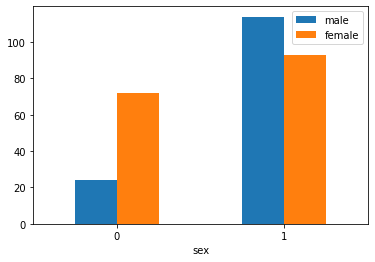

In [ ]:
pd.crosstab(df['sex'], df['target']).plot(kind= 'bar')
plt.legend(('male', 'female'))
plt.xticks(rotation = 0);

In [ ]:
# Trying to get number of females vs males with respect to target column.
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
# Let us see the complete info about the dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# The other way of getting some information about the dataset is by using info function, which gives info about type of the data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


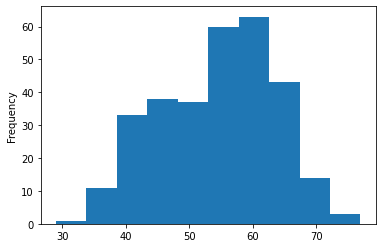

In [ ]:
# Checking if we have any outliers in our dataframe by checking some distributions of that 
df.age.plot(kind= 'hist')

In [ ]:
# Analysing data with respect to Age column and heart rate(Thalach) on target
pd.crosstab(df.thalach,df.target)

target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1
...,...,...
190,0,1
192,0,1
194,0,1


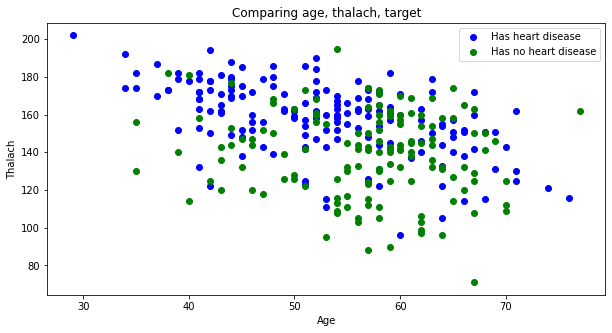

In [ ]:
# Lets visualize the data on a scatter plot
plt.figure(figsize = (10,5))
# Here plot is for the data samples who has heart disease
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c = 'blue')
# Here plot is for the data samples who do not have heart disease
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c= 'green')
# Customizing the plot
plt.legend(('Has heart disease', 'Has no heart disease'))
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.title('Comparing age, thalach, target');

In [ ]:
# Here we shall compare the chest pain feature with the target using crosstab
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


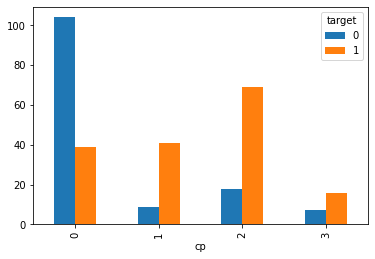

In [ ]:
# Here we plot the results of the crosstab between chest pain and the target 
pd.crosstab(df['cp'], df['target']).plot(kind = 'bar');

In [ ]:
# Now we shall check correlations between the features and target using a correlation matrix
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


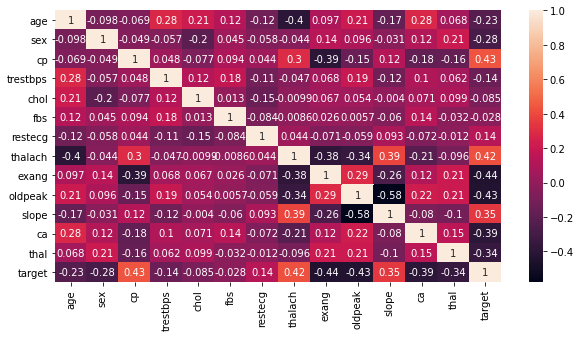

In [ ]:
# We shall, visualise the correlation matrix on the seaborn heatmap
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.heatmap(corr_matrix, annot = True)

### Getting into the machine learning part 

In [ ]:
# We shall start the modelling part

# We shall split the data into X, y
X = df.drop(['target'], axis = 1)
y = df['target']
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
# We shall split data into train and test sets using sklearn
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [ ]:
y_train[:5]

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [ ]:
# Note : The length of the both the train data of X, y should be the SAME

In [ ]:
# In here we shall take up an estimator and try to use in our project and see if that can make good results
# Decision on which estimator to be used, at first we consider 3 most suitable estimators to our problem, check each of them carefully.
# 1. LogisticRegression (despite of its name having regression, its a classification model in sklearn)
# 2. KNeighborsClassifier
# 3. RandomForestClassifier

In [ ]:
# Let us create a dictionary variable to instantiate all three models and loop through them to check their scores on splitted data.
models_used = {'Logistic Regression': LogisticRegression(), 
               'KNN': KNeighborsClassifier(), 
               'Random Forest': RandomForestClassifier()}
def fit_and_score(models_used, X_train, y_train, y_test, X_test):
  '''
  A function to fit all three models and calculate the scores of them so that we can analyse the performance of each models seperately. We use 
  1. X_train
  2. X_test
  3. y_train
  4. y_test
  '''
  # Setting a random seed
  np.random.seed(42)
  # Now, we shall create a dict to store evaluation scores of the models we considered to use in our project.
  models_score = {}
  # Loop through the items of the models_used
  for name, model in models_used.items() :
    # Fit the model on X_train, y_train and testing it on the X_test, y_test.
    model.fit(X_train, y_train)
    # Evaluating the model
    score = model.score(X_test, y_test)
    models_score[name] = score
  return models_score

In [ ]:
models_scores = fit_and_score(models_used = models_used, 
                              X_train = X_train,
                              y_train = y_train, 
                              y_test = y_test, 
                              X_test = X_test)
models_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

#### Models comparision

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

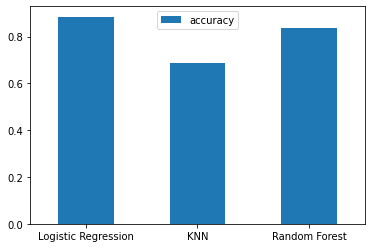

In [ ]:
# Lets compare the scores of all three models we used in the prediction
models_compare = pd.DataFrame(models_scores, index = ['accuracy'])
models_compare.T.plot(kind = 'bar')
plt.xticks(rotation = 0)

In [ ]:
# We can conclude that among the models we compared, we get that logistic regression has highest score,
# But we need to check few more evalution metrics like f1 score, recall, confusion matrix before coming to an conclusion on the model performance
# Let us tune hyperparameters of each model and then check out the different evaluation metrics
# We shall check the following evaluation metrics and take decision on the model to be used in the real practice.
# 1. Hyperparameter tuning to all three models
# 2. Check each feature and its importance
# 3. confusion matrix
# 4. classification report
# 5. f1 score
# 6. recall
# 7. precision score
# 8. accuracy
# 9. ROC curve
# 10. Area under the curve

#### Hyperparameter tuning section

In [ ]:
# Let us first tune hyperparameters to the KNN models and check if we can make the model efficient.
# To store the model scores on different values of hyperparameters to the KNN model
train_scores = []
test_scores = []
# According to docs on KNN on scikit learn, we get to know to tune kneighbors form (1, 21) to check the performance of the model
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
# Loop to iterate over the tuned values of the model
for i in range(1,22) :
  KNN.set_params(n_neighbors = i) 
  train_score = KNN.score(X_train, y_train)
  test_score = KNN.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)
max_score = np.max(test_scores)

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058,
 0.6859504132231405]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853]

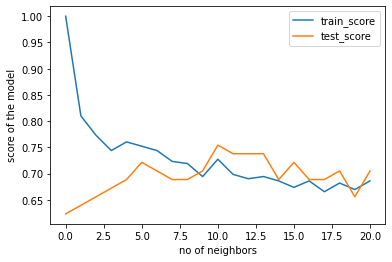

In [ ]:
# Lets us visualise the results on a line plot.
plt.plot(train_scores)
plt.plot(test_scores)
plt.xlabel('no of neighbors')
plt.ylabel('score of the model')
plt.xticks(rotation =0)
max_score
plt.legend(('train_score', 'test_score'));

In [ ]:
# We get that at n_neighbors when equal to 11, we got the highest performance of the KNN model but still it is way behind the other two, so for now we shall discard this one and continue hyperparameter tuning on the other two
# Let us tune hyperparameters of Random Forest classifier and Logistic regression, and since we have different hyperparameters to tune, it may not be efficient to use loop to do experiments on different hyperparameter values in models so we use Randomized CV to do that for us

#### Hyperparameter tuning using RandomizedSearchCV, GridSearchCV

In [ ]:
# Now we shall use Randomized Search CV on Random Forest Classifier and Logistic Regression 
# We shall make some grids to store all hyperparameter that we got to do after some research on the most important onces.

# Grid to Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20), 
                'solver': ['liblinear']}
# Grid to Random Forest Classifier
rf_grid = {'n_estimators': np.arange(10, 1000, 50), 
                      'max_depth': [None, 3, 5, 10], 
                      'min_samples_split': np.arange(2, 20, 2), 
                      'min_samples_leaf': np.arange(1, 20, 2)}

In [ ]:
# We shall use these grids now in RandomizedSearchCV to get scores of the logistic and Random Forest estimators
# Setting up random seed.
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid, 
                                cv = 5, 
                                n_iter = 20, 
                                verbose = True)
# Fit our model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [ ]:
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Well its alomst the same score of default Logistice Regression score before actually tuning and moreover its again the tuning on only two hyperparameters.

In [ ]:
# Let us check the results of RandomizedSearchCV on RandomForestClassifier
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid, 
                           cv =5, 
                           n_iter = 20, 
                           verbose = True)
# Fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# let us check the best hyperparameter values that has given highest performance to the model on the current working hyperparameters for tuning.
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [ ]:
# Evaluating the highest score to the model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [ ]:
# Now that we can see, the highest model performance of logistic regression is same as that of RandomForestClassifier so now we need to do some extensive hyperparamter on RandomForestClassifier using Grid Search CV.
# By doing some hyperparameter tuning using GridSearchCV or RandomizedSearchCV with more n_iter values, we can check all possible versions of hyperparameter in rs_grid so that we may end up getting even best results using Random Forest Classifier

In [ ]:
# Using Randomized Search CV with higher n_iter values on the same rs_grid so get more insights on tuning
rf_grid = {'n_estimators': np.arange(10, 1000, 50), 
            'max_depth': [None, 3, 5, 10], 
                      'min_samples_split': np.arange(2, 20, 2), 
                      'min_samples_leaf': np.arange(1, 20, 2)}
# Setting random seed.
np.random.seed(42)
# We shall use Randomized Search now with high n_iter value.
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           n_iter = 100,  
                           cv =5, 
                           verbose = True)
# Fit the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Okayy, now we shall figure out the best hyperparameter values which give highest results to RandomForestClassfier
rs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 10}

In [ ]:
# Let us look at the score of the best parameters.
rs_rf.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Let us do GridSearchCV on the Random Forest Classifier
rf_grid = {'n_estimators': np.arange(10, 710, 50), 
            'max_depth': [3], 
                      'min_samples_split': np.arange(2, 10, 2), 
                      'min_samples_leaf': np.arange(1, 20, 2)}
# Setting up random seed.
np.random.seed(42)
# Let us use GridCV.
gs_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid = rf_grid,
                           cv = 2, 
                           verbose = True)
# Fit the model
gs_rf.fit(X_train, y_train)
# NOTE: This cell takes really long time to run, since we are doing extensive hyperparameter tuning using GridSearchCV. (may take 10 or so minutes).

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 2 folds for each of 560 candidates, totalling 1120 fits


[Parallel(n_jobs=1)]: Done 1120 out of 1120 | elapsed:  8.7min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
# Checking the best suitable hyperparameters of the model after extensive search.
gs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 9,
 'min_samples_split': 4,
 'n_estimators': 460}

In [ ]:
# Evaluating the model
gs_rf.score(X_test, y_test)

0.8688524590163934

In [ ]:
# Even after doing some extensive tuning still the score of Random Forest Classifier has a little less score then default score of Logistic Regression so, we shall look into evaluation metrics of Logistic Regression model on this problem.

In [ ]:
# Since now that we found the right model to use for our machine learning project, we shall focus on evaluating our chosen model using :
# 2. Check each feature and its importance
# 3. confusion matrix
# 4. classification report
# 5. f1 score
# 6. recall
# 7. precision score
# 8. accuracy
# 9. ROC curve
# 10. Area under the curve

In [ ]:
# At first we shall plot a roc curve to check the performance of the model.
y_preds = rs_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

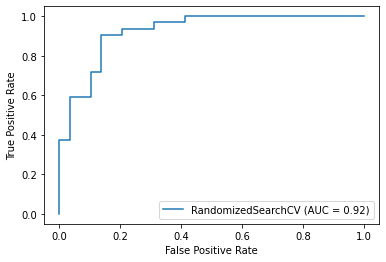

In [ ]:
# Let us visualize the predicts vs true values on a roc curve.
plot_roc_curve(rs_log_reg,
               X_test, 
               y_test);    
# We can see the area under the curve      

In [ ]:
# Let us take a look at confusion matrix for the logistic regression 
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]])

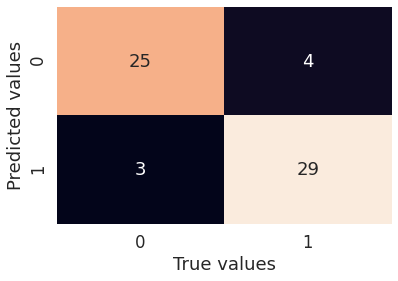

In [ ]:
# Now, we shall visulize confusion matrix of our model using seaborn heatmap.
sns.set(font_scale = 1.5)
def plot_con_fun_matrix(y_test, y_preds) :
  '''
  Funtions takes in the true and predicted values of the model and plots the confusion matrix using seaborn heat.
  '''
  fig, ax = plt.subplots()
  ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                  cbar = False, 
                  annot= True)
  plt.xlabel('True values')
  plt.ylabel('Predicted values')
plot_con_fun_matrix(y_test, y_preds)

In [ ]:
# We shall continue with our evaluation metrics, classification report, cross validated f1 score, recall score, precision scores and more.
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# Get the best params of the model
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# Now that we got the values of different evaluation metrics but those are not cross validated.
# We shall do some cross validation using cross_val_score()
# First we instatiate the model again to best parameters 
clf = LogisticRegression(C = 0.23357214690901212, 
                         solver = 'liblinear')
# We shall create a dictionary to store and get all required evaluation metrics
metrics_dict = {'precision_macro': None, 
                'accuracy': None, 
                'f1_macro': None, 
                'recall_macro': None }
# Let me make handy function to do cross validation to get metrics like precision, accuracy, f1_score, recall
def cross_val_score_fun(metrics) :
  # Loop to cross validate all evaluation metrics
  for name, value in metrics_dict.items() :
    cross_score = cross_val_score(clf, 
                                  X, 
                                  y, 
                                  cv = 5, 
                                  scoring = name)
    metrics_dict.update({name: cross_score})

In [ ]:
cross_val_score_fun(metrics_dict)

In [ ]:
metrics_dict

{'accuracy': array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ]),
 'f1_macro': array([0.81241264, 0.9003268 , 0.88323763, 0.88064791, 0.73768581]),
 'precision_macro': array([0.83988095, 0.9043956 , 0.89055556, 0.88888889, 0.7625    ]),
 'recall_macro': array([0.80898268, 0.8982684 , 0.88041126, 0.87710438, 0.73569024])}

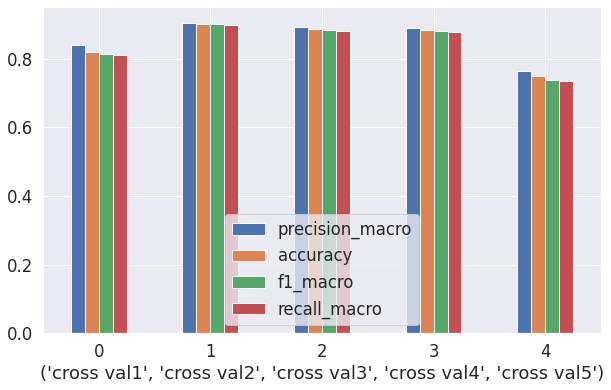

In [ ]:
# These are the different evaluation metric values and to understand we shall go with a bar plot.
scores_df = pd.DataFrame(metrics_dict)
scores_df.plot(kind = 'bar', figsize = (10, 6))
plt.xlabel(('cross val1', 'cross val2', 'cross val3', 'cross val4', 'cross val5'))
plt.xticks(rotation = 0);

In [ ]:
# Almost we covered all the evaluation metrics, now lets go and find importance of each feature in our dataset.
# First we instatiate the model again to best parameters 
clf = LogisticRegression(C = 0.23357214690901212, 
                         solver = 'liblinear')
clf.fit(X_train, y_train)
# We shall use the coef_ attribute to get the importance of each feature.
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [ ]:
# We shall have a glance at our dataset to know our next focus on ....
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Let us put the coefficient values of each feature in a dict against the concerned column.
feature_imp = dict(zip(df.columns, list(clf.coef_)[0]))
feature_imp

{'age': 0.003699220776580221,
 'ca': -0.6516534770577476,
 'chol': -0.0017036439067759743,
 'cp': 0.6747282587404362,
 'exang': -0.6312040612837573,
 'fbs': 0.047876881148997324,
 'oldpeak': -0.5759095045469952,
 'restecg': 0.3349019815885189,
 'sex': -0.9042409028785717,
 'slope': 0.4709514073081419,
 'thal': -0.6998420764664995,
 'thalach': 0.02472938284108309,
 'trestbps': -0.011613401339975146}

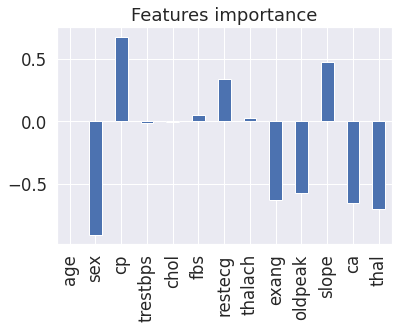

In [ ]:
# Still the importance of features is incomplete as it need to be visualized to get some insights from the plot.
feature_imp_df = pd.DataFrame(feature_imp, index = [0])
feature_imp_df.T.plot(kind = 'bar', 
                      title = 'Features importance', 
                      legend = False);

In [ ]:
# Okay, now we can see that sex, and few more has some good correlation with the target column.
# From this section, we can know tht almost all has some correlation or contribution towards prediction of the model but few like cholestrol : 0  and even thrstbps, thalach has negligialbe.
# Let us compare highly correlated once using crosstab
pd.crosstab(df.sex, df.target)
# It is clear that sex has - ve correlation with the target so as value of sex decreases the value of the target increases.

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
# Now we shall look into the slope feature of our dataset since it has some good correlation.
pd.crosstab(df.slope, df.target)
# It is again evident from crosstab that slope has some + ve correlation with the target i.e., as the value of the slope increases the value of the target also gets increased.

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [ ]:
# To know what slope means in any patient, I would highly recommend to go through the link below.
# slope: the slope of the peak exercise ST segment
# -- Value 1: upsloping
# -- Value 2: flat
# -- Value 3: downsloping
# https://archive.ics.uci.edu/ml/datasets/heart+disease

In [ ]:
# Now we shall review the code once and shall take a look into feature engineering part to make our model robust.
# Hold on and now we shall we a thought, how to improve our model as even after hell of research, I we could get only 88% of model accuracy but we need to more right so the next steps are:
# 1. Could we go for better model? like CatBoost or XGBoost 
# 2. Could we go and get more data to train our model
# 3. Could we improve the current model by some means like feature engineering or so 
# And at last we need try exporting this whole machine learning model

In [ ]:
# We shall first try feature engineering as we are certain on that, and since we can not get more data we are taking that from a open source but this can be done if we have client who can do that. 
# And our last option would be using models from CatBoost or so.

In [ ]:
# Feature Engineering 
clf = LogisticRegression(C = 0.23357214690901212, 
                         solver = 'liblinear')
clf.fit(X_train.drop(['chol'], axis =1), y_train)
clf.score(X_test.drop(['chol'], axis =1), y_test)

0.8852459016393442

In [ ]:
# we get still the same so we do drop one or more features
clf = LogisticRegression(C = 0.23357214690901212, 
                         solver = 'liblinear')
clf.fit(X_train.drop(['chol', 'thalach'], axis =1), y_train)
clf.score(X_test.drop(['chol', 'thalach'], axis =1), y_test)

0.8688524590163934

In [ ]:
# So, we end up getting do go for some better models or just do some research, we shall get back, after my continued research...
# But we, reached till the below point,
clf = LogisticRegression(C = 0.23357214690901212, 
                         solver = 'liblinear')

clf.fit(X_train.drop(['chol'], axis =1), y_train)
clf.score(X_test.drop(['chol'], axis =1), y_test)
# One thing is for sure that the model performance gets increased if we can train on some more data, but here since we are using only 303 samples, so we could not get the most out of our model.
# But any ways we will try improving model further.

0.8852459016393442

In [ ]:
# We shall arrange columns of dataset based on importance of features.
feature_imp_sorted = dict(sorted(feature_imp.items(), key=lambda item: abs(item[1]), reverse = True))
feature_imp_sorted_df = pd.DataFrame(feature_imp_sorted, index = [0])
feature_imp_sorted_df.head()

,sex,thal,cp,ca,exang,oldpeak,slope,restecg,fbs,thalach,trestbps,age,chol
0,-0.904241,-0.699842,0.674728,-0.651653,-0.631204,-0.57591,0.470951,0.334902,0.047877,0.024729,-0.011613,0.003699,-0.001704


In [ ]:
# We shall shuffle the columns in our dataset and see if we can make some progress,
sorted_df = pd.DataFrame.reindex(df, 
                     columns = feature_imp_sorted_df.columns)
sorted_df.head()

,sex,thal,cp,ca,exang,oldpeak,slope,restecg,fbs,thalach,trestbps,age,chol
0,1,1,3,0,0,2.3,0,0,1,150,145,63,233
1,1,2,2,0,0,3.5,0,1,0,187,130,37,250
2,0,2,1,0,0,1.4,2,0,0,172,130,41,204
3,1,2,1,0,0,0.8,2,1,0,178,120,56,236
4,0,2,0,0,1,0.6,2,1,0,163,120,57,354


In [ ]:
# Train the model and test that out, 
X_sorted = sorted_df
y_sorted = y
# Setting random seed
np.random.seed(42)
# Splittng our data
X_train, X_test, y_train, y_test = train_test_split(X_sorted, y_sorted, test_size= 0.2)
clf = LogisticRegression(C = 0.23357214690901212, 
                         solver = 'liblinear')
# Fittting our data
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8852459016393442

In [ ]:
# We shall at last  check the predict proba
clf.predict_proba(X_test)

array([[0.87296878, 0.12703122],
       [0.24391169, 0.75608831],
       [0.18170687, 0.81829313],
       [0.94919412, 0.05080588],
       [0.10860222, 0.89139778],
       [0.12406763, 0.87593237],
       [0.39685352, 0.60314648],
       [0.99609471, 0.00390529],
       [0.98763631, 0.01236369],
       [0.44634256, 0.55365744],
       [0.27791688, 0.72208312],
       [0.88623141, 0.11376859],
       [0.10923937, 0.89076063],
       [0.94500474, 0.05499526],
       [0.03001147, 0.96998853],
       [0.06638681, 0.93361319],
       [0.03353118, 0.96646882],
       [0.90961524, 0.09038476],
       [0.98402494, 0.01597506],
       [0.97568873, 0.02431127],
       [0.28406576, 0.71593424],
       [0.97537399, 0.02462601],
       [0.85826368, 0.14173632],
       [0.27265927, 0.72734073],
       [0.11267452, 0.88732548],
       [0.30602337, 0.69397663],
       [0.15210922, 0.84789078],
       [0.31193285, 0.68806715],
       [0.98338528, 0.01661472],
       [0.11761076, 0.88238924],
       [0.

### And finally we made that, now the score is almost, 91, which is pretty  good..... Thank you..